<a href="https://colab.research.google.com/github/Talizg03/FInal-DS18/blob/main/27_5_25_model_RUN_500_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import os

drive_root = '/content/drive/MyDrive'

print("Files and folders in MyDrive:")
print(os.listdir(drive_root))


Files and folders in MyDrive:
['Copy of \u2068עידו.mp4\u2069', 'עותק של 11.2.25 V60 best score .ipynb', 'עותק של 12.2.25 Final!', '12.2.25 Final!.ipynb', 'slices_output.zip', 'Colab Notebooks']


In [3]:
zip_path = '/content/drive/MyDrive/slices_output.zip'


In [4]:
import zipfile
import os

# Folder where you want to extract the contents
extract_folder = '/content/slices_output'

# Create folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Extracted all files to {extract_folder}")


Extracted all files to /content/slices_output


#2. Prepare your image data generators for training and validation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    extract_folder,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    extract_folder,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 200730 images belonging to 2 classes.
Found 50181 images belonging to 2 classes.


#3. Define, compile, and summarize your model

In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(*IMG_SIZE, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,569 (396.75 KB)

 Trainable params: 101,569 (396.75 KB)

 Non-trainable params: 0 (0.00 B)

4. Train your model

In [7]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=500,         # הגבלת צעדים לאימון (≈ מספר batchים)
    validation_steps=100         # הגבלת צעדים לוולידציה
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 577s 1s/step - accuracy: 0.6552 - loss: 0.5834 - val_accuracy: 0.7047 - val_loss: 0.4934
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.6994 - loss: 0.5006 - val_accuracy: 0.6969 - val_loss: 0.5057
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 565s 1s/step - accuracy: 0.7216 - loss: 0.4786 - val_accuracy: 0.7547 - val_loss: 0.4401
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 623s 1s/step - accuracy: 0.7694 - loss: 0.4399 - val_accuracy: 0.7812 - val_loss: 0.4254
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 572s 1s/step - accuracy: 0.8063 - loss: 0.4012 - val_accuracy: 0.8303 - val_loss: 0.3742
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 564s 1s/step - accuracy: 0.8353 - loss: 0.3560 - val_accuracy: 0.8400 - val_loss: 0.3620
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 562s 1s/step - accuracy: 0.8454 - loss: 0.3429 - val_accuracy: 0.8166 - val_loss: 0.3830
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 562s 1s/step - accuracy: 0.8484 - loss: 0.3304 - val_accu

In [ ]:
#history = model.fit(
   # train_gen,
    #validation_data=val_gen,
    #epochs=10)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6273/6273 ━━━━━━━━━━━━━━━━━━━━ 6526s 1s/step - accuracy: 0.7553 - loss: 0.4453 - val_accuracy: 0.8641 - val_loss: 0.3192
Epoch 2/10
6273/6273 ━━━━━━━━━━━━━━━━━━━━ 6453s 1s/step - accuracy: 0.8837 - loss: 0.2720 - val_accuracy: 0.8885 - val_loss: 0.2719
Epoch 3/10
2467/6273 ━━━━━━━━━━━━━━━━━━━━ 1:00:17 950ms/step - accuracy: 0.8995 - loss: 0.2379

In [8]:
model.save('/content/my_model.h5')


#5. Print final training and validation accuracy

In [9]:
train_acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100

print(f"✅ Final Training Accuracy: {train_acc:.2f}%")
print(f"✅ Final Validation Accuracy: {val_acc:.2f}%")


✅ Final Training Accuracy: 85.35%
✅ Final Validation Accuracy: 84.25%


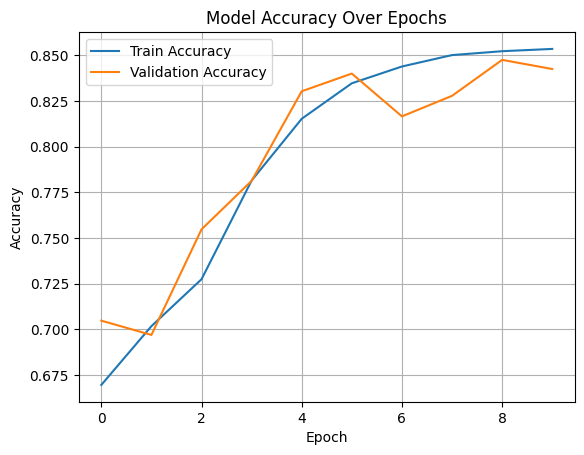

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
